# Simulator PV and unavaibility 

- Author: Victor Muñoz
- Collaborator: Nicolás Otárola
- Pvlib_version: 0.9.0
- Date : 31-08-2022 

In [1]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Photovoltaic systems
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

# paths
file_path_gen = '../../Data/Real_Generations_Data/'
file_path_solcast = '../../Data/Solcast_Data/'
file_path_func = '../../Functions/'

# system set paths 
import sys
sys.path.append(file_path_gen)
sys.path.append(file_path_solcast)
sys.path.append(file_path_func)

# functions
import functions as func
import Simulator_config as pv

# reload functions
import imp
imp.reload(pv)
imp.reload(func)

# save graphics
%matplotlib inline
%matplotlib notebook


# html graphics
import bokeh as boken
from bokeh.plotting import figure, output_file, show
import bokeh.palettes as bkpalet #from bokeh.palettes import PuOr
import bokeh.transform as bktrans # from bokeh.transform import cumsums

#new library
from pvlib.pvsystem import FixedMount
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

# Index

 1. Simulation  
     1.1. Temperature model  
     1.2. Location  
     1.3. Module  
     1.4. Inverter  
     1.5. System  
     1.6. Model  
     1.7. Data Weather Solcast  
     1.8. Run model  
     1.9. Get hourly simulation and graph    
     1.10. Get daily simulation and graph  
     1.11. Get monthly simulation and graph  
     
     
 2. Data real  
     2.1. Read pickle  
     2.2. Names pv  
     2.3. Data per hour  
     2.4. Data per day  
     2.5. Unavaibility data  
     2.6. Graph Real Generation
 3. Graph Real Generation and Simulation  
     3.1. Per hour  
     3.2. Per day  


 
 
 

## 1) Simulation

### 1.1) Temperature model

In [2]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
temperature_model_parameters

{'a': -3.47, 'b': -0.0594, 'deltaT': 3}

### 1.2)  Location

In [3]:
#Location
loc = Location(latitude=pv.Location['lat'],
               longitude=pv.Location['long'],
               tz=pv.Location['tz'],
               altitude=pv.Location['alt'])

### 1.3) Module

In [4]:
#module
module_340 = pd.Series(pv.TSM_TEG14,
                       name=pv.TSM_TEG14['Name'])

### 1.4) Inverter

In [5]:
#inverter
inverter_1600 = pd.Series(pv.INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_1600TL_U_B615_Indoor__450V_,
                            name=pv.INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_1600TL_U_B615_Indoor__450V_['Name'])

### 1.5) System

In [6]:
#System
system_A = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_B = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_C = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_D = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_E = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_F = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )


### 1.6) Model 

In [7]:
#model
mc_A = ModelChain(system_A, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_A")             # system_A

mc_B = ModelChain(system_B, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_B")             # system_B

mc_C = ModelChain(system_C, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_C")             # system_C

mc_D = ModelChain(system_D, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_D")             # system_A

mc_E = ModelChain(system_E, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_E")             # system_B

mc_F = ModelChain(system_F, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_F")             # system_C



### 1.7) Data Weather Solcast

In [8]:
# Weather Solcast
name_csv = '-33.5587_-70.87498_Solcast_PT60M.csv'
columns_test = ['PeriodEnd','PeriodStart','Period','dhi','dni','ghi']
solcast = func.weather_solcast_3(file_path_solcast+name_csv,columns_test,pr=True)
#weather_columns = ['ghi','dni','dhi','temp_air', 'wind_speed','ebh','azimuth','cloud_opacity','zenith','relative_humidity']
weather_columns = ['ghi','dni','dhi']
times, weather = func.get_times_weather(solcast,loc,weather_columns)

#para que conincidan los largos
#to-do: automatizacion/refactoring

#print(len(times[1175:-23]))
#print(times[1175:-23])

#print(len(weather[1175:-23]))
#print(weather[1075:-23])

#times = times[1175:-23]
#weather = weather[1175:-23]
weather.head(20)

                 PeriodEnd           PeriodStart Period  dhi   dni  ghi
0     2020-12-31T02:00:00Z  2020-12-31T01:00:00Z  PT60M    0     0    0
1     2020-12-31T03:00:00Z  2020-12-31T02:00:00Z  PT60M    0     0    0
2     2020-12-31T04:00:00Z  2020-12-31T03:00:00Z  PT60M    0     0    0
3     2020-12-31T05:00:00Z  2020-12-31T04:00:00Z  PT60M    0     0    0
4     2020-12-31T06:00:00Z  2020-12-31T05:00:00Z  PT60M    0     0    0
...                    ...                   ...    ...  ...   ...  ...
8801  2022-01-01T19:00:00Z  2022-01-01T18:00:00Z  PT60M   88  1000  992
8802  2022-01-01T20:00:00Z  2022-01-01T19:00:00Z  PT60M   84   969  853
8803  2022-01-01T21:00:00Z  2022-01-01T20:00:00Z  PT60M   75   916  666
8804  2022-01-01T22:00:00Z  2022-01-01T21:00:00Z  PT60M   63   824  449
8805  2022-01-01T23:00:00Z  2022-01-01T22:00:00Z  PT60M   46   661  228

[8806 rows x 6 columns]
primer dia 2020-12-31 01:00:00+00:00
ultimo dia 2022-01-01 22:00:00+00:00


,ghi,dni,dhi
date,,,
2020-12-31 01:00:00+00:00,0,0,0
2020-12-31 02:00:00+00:00,0,0,0
2020-12-31 03:00:00+00:00,0,0,0
2020-12-31 04:00:00+00:00,0,0,0
2020-12-31 05:00:00+00:00,0,0,0
2020-12-31 06:00:00+00:00,0,0,0
2020-12-31 07:00:00+00:00,0,0,0
2020-12-31 08:00:00+00:00,0,0,0
2020-12-31 09:00:00+00:00,5,10,5


### 1.8) Run model

In [9]:
mc_A.run_model(weather=weather)
mc_B.run_model(weather=weather)
mc_C.run_model(weather=weather)
mc_D.run_model(weather=weather)
mc_E.run_model(weather=weather)
mc_F.run_model(weather=weather)

ModelChain: 
  name: system_F
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: pvwatts_dc
  ac_model: pvwatts_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

 ### 1.9) Get hourly simulation and graph

In [10]:
x_h ,y_h_a = func.get_hourly_axes_from_modelChain_object(mc_A, 'System_A')
_ ,y_h_b = func.get_hourly_axes_from_modelChain_object(mc_B, 'System_B')
_ ,y_h_c = func.get_hourly_axes_from_modelChain_object(mc_C, 'System_C')
_ ,y_h_d = func.get_hourly_axes_from_modelChain_object(mc_D, 'System_D')
_ ,y_h_e = func.get_hourly_axes_from_modelChain_object(mc_E, 'System_E')
_ ,y_h_f = func.get_hourly_axes_from_modelChain_object(mc_F, 'System_F')

y_h = [(a+b)/1000000 for a,b,c,d,e,f in zip(y_h_a,y_h_b,y_h_c,y_h_d,y_h_e,y_h_f)]

/home/nikolas/miniconda3/envs/ecr_solar/lib/python3.10/site-packages/pvlib/modelchain.py:507: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


In [11]:
x_h=x_h.drop(x_h[-3:])
y_h=y_h[3:]

<IPython.core.display.Javascript object>


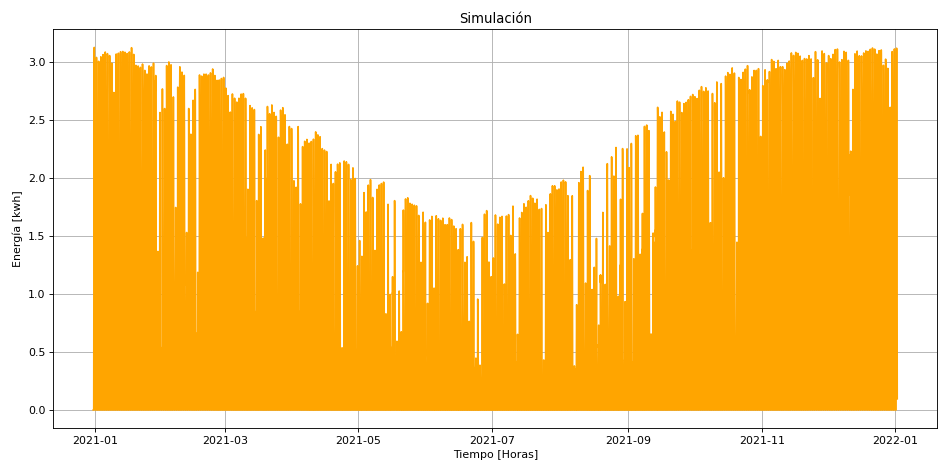

In [12]:
func.plot_1(x=x_h,
            y=y_h,
            size=(12,6),
            save='si',
            name_file='Simulation_hour',
            color='orange',
            title='Simulación',
            x_label='Tiempo [Horas]',
            y_label='Energía [kwh]')

 ### 1.10) Get daily simulation and graph

In [13]:
x_d ,y_d_a = func.get_daily_axes_from_modelChain_object(mc_A, 'System_A')
_ ,y_d_b = func.get_daily_axes_from_modelChain_object(mc_B, 'System_B')
_ ,y_d_c = func.get_daily_axes_from_modelChain_object(mc_C, 'System_C')
_ ,y_d_d = func.get_daily_axes_from_modelChain_object(mc_D, 'System_D')
_ ,y_d_e = func.get_daily_axes_from_modelChain_object(mc_E, 'System_E')
_ ,y_d_f = func.get_daily_axes_from_modelChain_object(mc_F, 'System_F')

y_d = [(a+b)/1000 for a,b,c,d,e,f in zip(y_d_a,y_d_b,y_d_c,y_d_d,y_d_e,y_d_f)]

/home/nikolas/miniconda3/envs/ecr_solar/lib/python3.10/site-packages/pvlib/modelchain.py:507: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


<IPython.core.display.Javascript object>


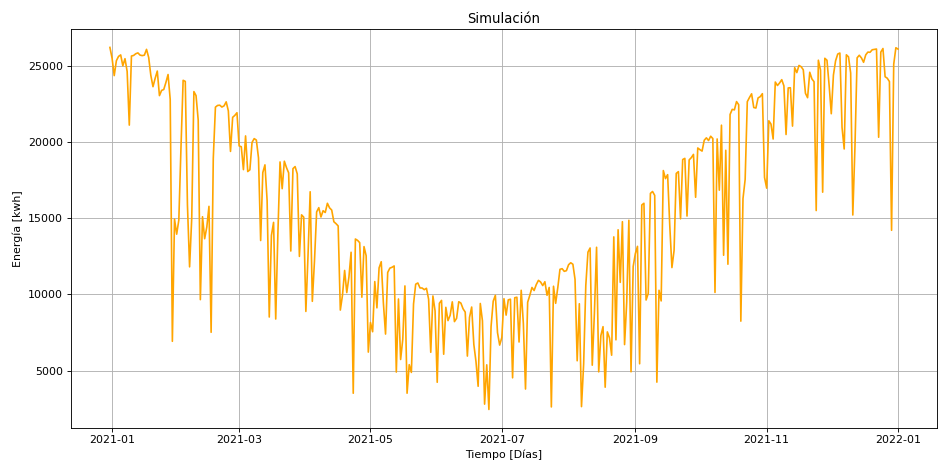

In [14]:
func.plot_1(x=x_d,
            y=y_d,
            size=(12,6),
            save='si',
            name_file='Simulation_day',
            color='orange',
            title='Simulación',
            x_label='Tiempo [Días]',
            y_label='Energía [kwh]')

 ### 1.11) Get monthly  simulation

In [15]:
x_m ,y_m_a = func.get_monthly_axes_from_modelChain_object(mc_A, 'System_A')
_ ,y_m_b = func.get_monthly_axes_from_modelChain_object(mc_B, 'System_B')
_ ,y_m_c = func.get_monthly_axes_from_modelChain_object(mc_C, 'System_C')
_ ,y_m_d = func.get_monthly_axes_from_modelChain_object(mc_D, 'System_D')
_ ,y_m_e = func.get_monthly_axes_from_modelChain_object(mc_E, 'System_E')
_ ,y_m_f = func.get_monthly_axes_from_modelChain_object(mc_F, 'System_F')

y_m = [(a+b)/1000 for a,b,c,d,e,f in zip(y_m_a,y_m_b,y_m_c,y_m_d,y_m_e,y_m_f)]

/home/nikolas/miniconda3/envs/ecr_solar/lib/python3.10/site-packages/pvlib/modelchain.py:507: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


<IPython.core.display.Javascript object>


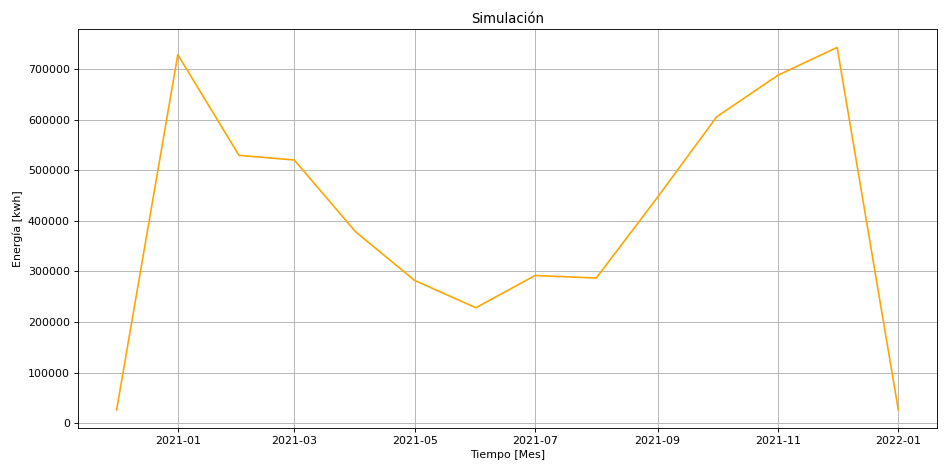

In [16]:
func.plot_1(x=x_m,
            y=y_m,
            size=(12,6),
            save='si',
            name_file='Simulation_month',
            color='orange',
            title='Simulación',
            x_label='Tiempo [Mes]',
            y_label='Energía [kwh]')

## 2) Real data

### 2.1) Read pickle

In [17]:
# read pickle
file_name = 'Real_Generations'
file_ext = 'xlsx'
data_pickle = func.data_to_pickle(file_path_gen,file_name,file_ext)

- Tried to read file picke: ../../Data/Real_Generations_Data/Real_Generations.pickle
Pickle found in: ../../Data/Real_Generations_Data/Real_Generations.pickle
Returning data


In [18]:
#data_pickle

### 2.2) Names PV

In [19]:
# names to seach
names_pv = ['PMGD PFV EL GUANACO SOLAR',
            'PMGD PFV PUENTE SOLAR',
            'PMGD PFV CITRINO']

### 2.3) Data per hour

In [20]:
# find hourly logs for each name
data_hours = func.filter_hour_from_dataFrame(data=data_pickle,
                                      #columns_names=[],
                                      #column_fecha='Fecha'
                                      #column_central='Central',
                                      first_year=2021,
                                      last_year=2021,
                                      names_pv=names_pv,
                                      months=[1,2,3,4,5,6,7,8,9,10,11,12],
                                      p = False)

- Using default  ['Hora 1', 'Hora 2', 'Hora 3', 'Hora 4', 'Hora 5', 'Hora 6', 'Hora 7', 'Hora 8', 'Hora 9', 'Hora 10', 'Hora 11', 'Hora 12', 'Hora 13', 'Hora 14', 'Hora 15', 'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19', 'Hora 20', 'Hora 21', 'Hora 22', 'Hora 23', 'Hora 24'] for columns_names 

- Using default Fecha for column_fecha 

- Using default Central for column_central 



### 2.4) Data per day

In [21]:
# find daily logs for each name
data_days = func.filter_day_from_dataFrame(data=data_pickle,
                                      #column_fecha='Fecha'
                                      #column_total='Total'
                                      #column_central='Central',
                                      first_year=2021,
                                      last_year=2021,
                                      names_pv=names_pv,
                                      months=[1,2,3,4,5,6,7,8,9,10,11,12],
                                      p = False)

- Using default Fecha for column_fecha 

- Using default Total for column_total 

- Using default Central for column_central 



### 2.5) Unavaibility data

In [22]:
umbral = 0
registro, indisp_total = func.indisponibilidad(data=data_hours,
                                               r_start=9,
                                               r_end=18,
                                               umbral=umbral,
                                               print_=False)

/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:804: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  indisp_total[pl][f+f.freq*1] = data[pl][f+f.freq*1]
/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:805: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  r[pl][f.date()][f.hour+1] = data[pl][f+f.freq*1]
/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:806: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  indisp_total[pl][f-f.freq*1] = data[pl][f-f.freq*1]
/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:807: FutureWarning: Timestamp.freq is deprecate

### 2.6) Graph Real Generation per hour

<IPython.core.display.Javascript object>


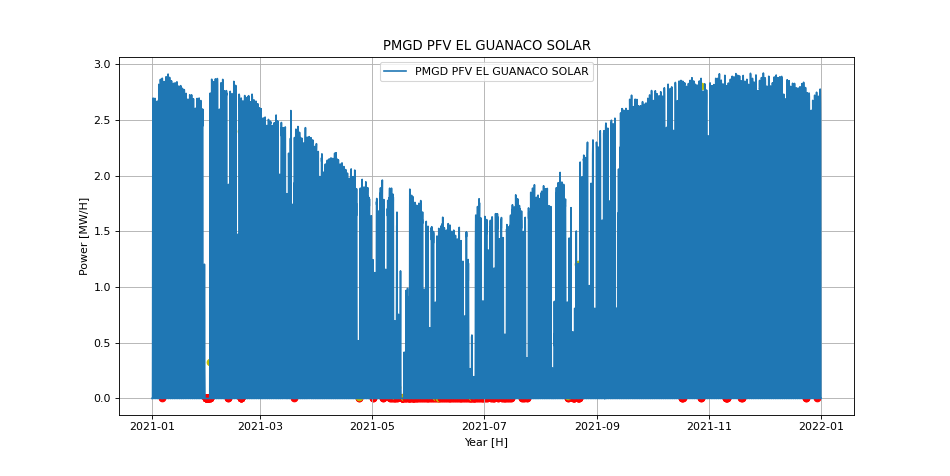

PMGD PFV EL GUANACO SOLAR len: 8760
x 8760
y 8760


<IPython.core.display.Javascript object>


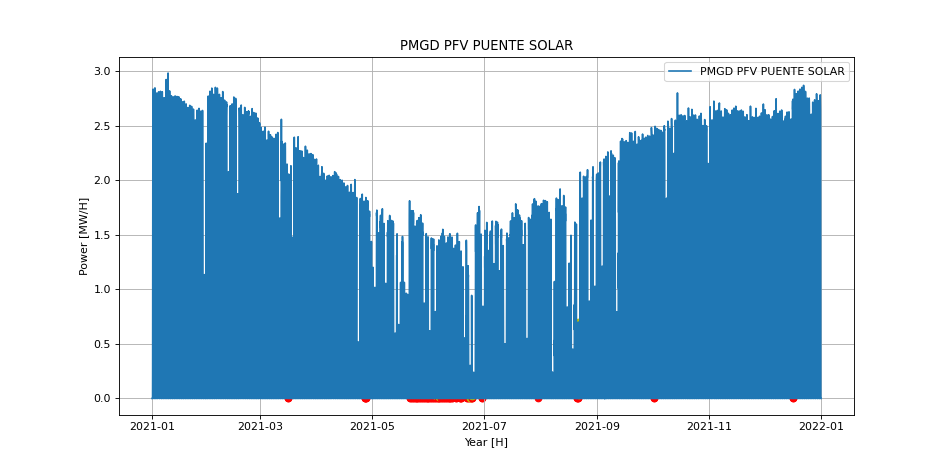

PMGD PFV PUENTE SOLAR len: 8760
x 8760
y 8760


<IPython.core.display.Javascript object>


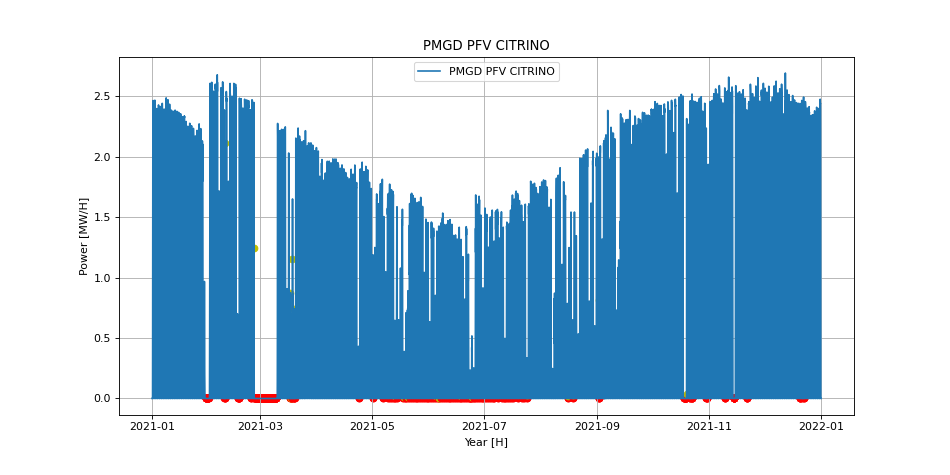

PMGD PFV CITRINO len: 8760
x 8760
y 8760


In [23]:
func.graph2(data=data_hours,
       x_label= 'Year [H]',
       y_label='Power [MW/H]',
       name='hour',
       indisp=indisp_total,
       umbral = umbral,
       size=40,
       dark=False)

### 2.7) Graph Real Generation per day

<IPython.core.display.Javascript object>


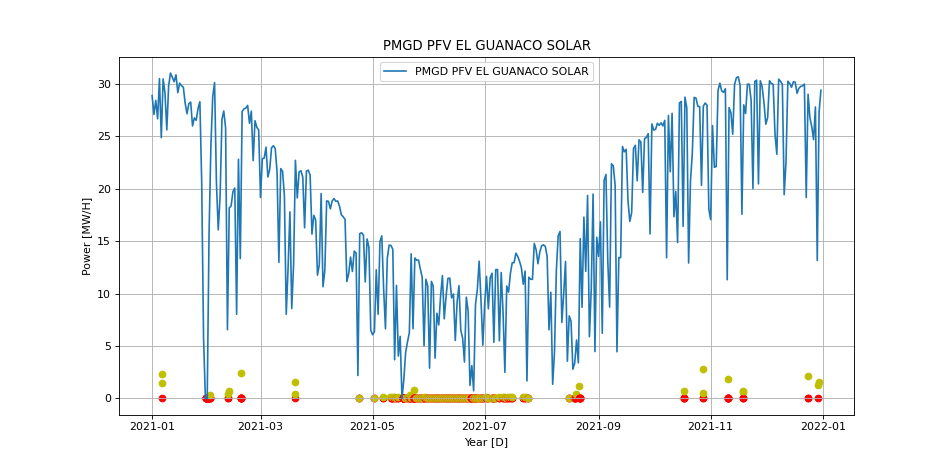

PMGD PFV EL GUANACO SOLAR len: 365
x 365
y 365


<IPython.core.display.Javascript object>


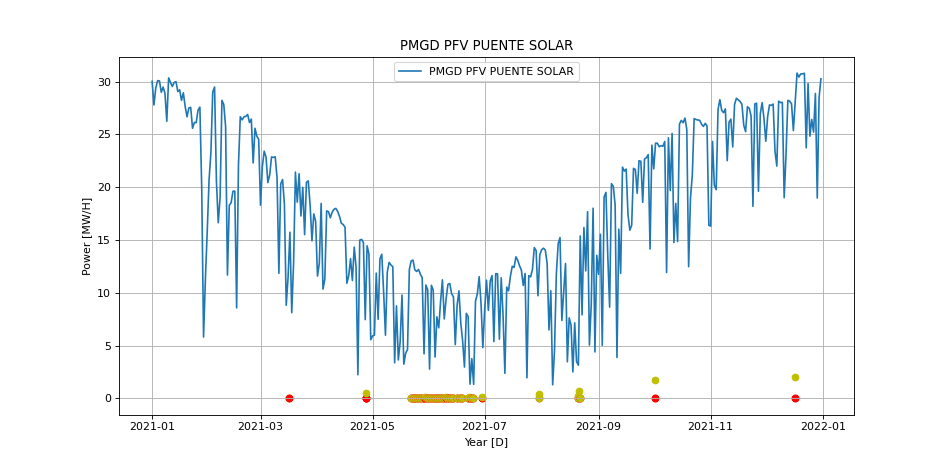

PMGD PFV PUENTE SOLAR len: 365
x 365
y 365


<IPython.core.display.Javascript object>


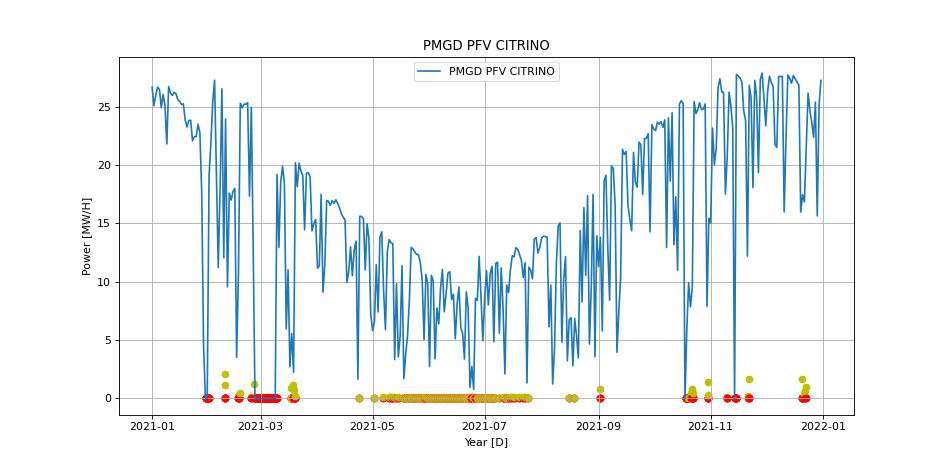

PMGD PFV CITRINO len: 365
x 365
y 365


In [24]:
func.graph2(data=data_days,
       x_label= 'Year [D]',
       y_label='Power [MW/H]',
       name='day',
       indisp=indisp_total,
       umbral = umbral,
       size=40,
       dark=False)

## 3) Graph Real Generation and Simulation

### 3.1) Per hour

long axis x = 8760


<IPython.core.display.Javascript object>


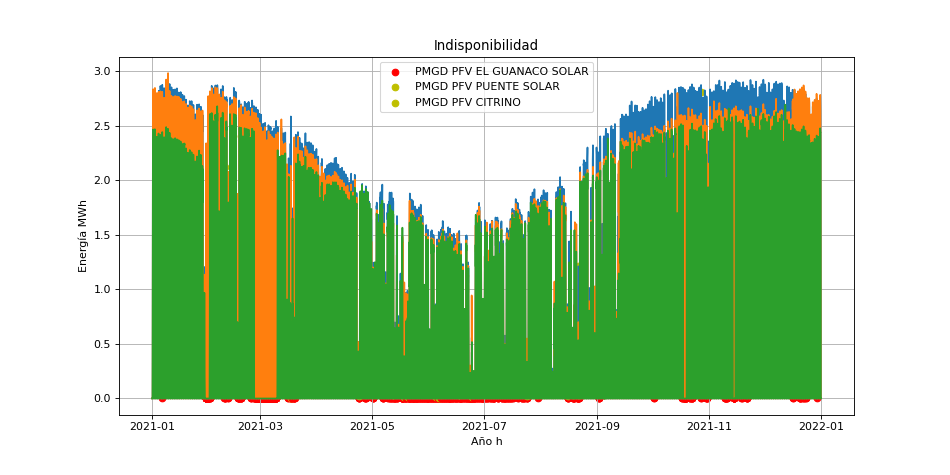

In [25]:
# colores:
# https://docs.bokeh.org/en/latest/docs/reference/colors.html
func.multi_graph_png_html3(data=data_hours,
                           x_sim=x_h,
                           y_sim=y_h,
                           x_label='Año h',
                           y_label='Energía MWh',
                           name='Indisponibilidad',
                           colors=['cornflowerblue','darkorange','green','purple','olive'],
                           indisp=indisp_total,
                           umbral=umbral,
                           size=40,
                           dark=True)

### 3.1) Per day


# Found inverter or module

In [26]:
#textos_modulos = ['JA','320',''] # tienen que ser 3 textos
#textos_inversores = ['','',''] # tiene que ser 3 textos
#c = func.buscador(textos_inversores,textos_modulos)

#for a in c:
#    print(a,":\n")
#    for i in c[a]:
#        print(i)

In [27]:
#data_h = data_hours[names_pv[1]].values()
#data_h = [float(x) for x in data_h]